In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import scipy.stats as stats


from sb_utils import save_file

In [2]:
cat_data = pd.read_csv('./Data/cat_clean.csv')

In [3]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5726 entries, 0 to 5725
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     5726 non-null   float64
 1   Gender                  5726 non-null   int64  
 2   Neuter_status           5726 non-null   int64  
 3   Breed_group             5726 non-null   object 
 4   Weaning_age             5726 non-null   int64  
 5   Outdoors                5726 non-null   int64  
 6   Other_cats              5726 non-null   int64  
 7   Activity_level          5726 non-null   int64  
 8   Contact_people          5726 non-null   int64  
 9   Aggression_stranger     5726 non-null   int64  
 10  Aggression_owner        5726 non-null   int64  
 11  Aggression_cats         5726 non-null   int64  
 12  Shyness_novel           5726 non-null   int64  
 13  Shyness_strangers       5726 non-null   int64  
 14  Grooming                5683 non-null   

Thank you shafqaatahma, you beautiful blessing to this world. See source code for chi2 heatmap [here](https://github.com/shafqaatahmad/chisquare-test-heatmap).

In [4]:
# Heatmap of chi2 p-values except for the components since obviously there will be multicollinearity there. 
no_comps_only_cat = cat_data.drop(columns=['Aggression_component', 'Extraversion_component', 'Shyness_component', 'Age'])
column_names=no_comps_only_cat.columns

chisqmatrix=pd.DataFrame(no_comps_only_cat,columns=column_names,index=column_names)

outercnt=0
innercnt=0
for icol in column_names:
    
    for jcol in column_names:
        
       mycrosstab=pd.crosstab(no_comps_only_cat[icol], no_comps_only_cat[jcol])
       #print (mycrosstab)
       stat,p,dof,expected=stats.chi2_contingency(mycrosstab)
       chisqmatrix.iloc[outercnt,innercnt]=round(p,3)
       cntexpected=expected[expected<5].size
       perexpected=((expected.size-cntexpected)/expected.size)*100
      
       #print (icol)
       #print (jcol)
       if perexpected<20:
            chisqmatrix.iloc[outercnt,innercnt]=2
       #print (perexpected) 
       if icol==jcol:
           chisqmatrix.iloc[outercnt,innercnt]=0.00
       #print (expected) 
       innercnt=innercnt+1
    #print (outercnt) 
    outercnt=outercnt+1
    innercnt=0

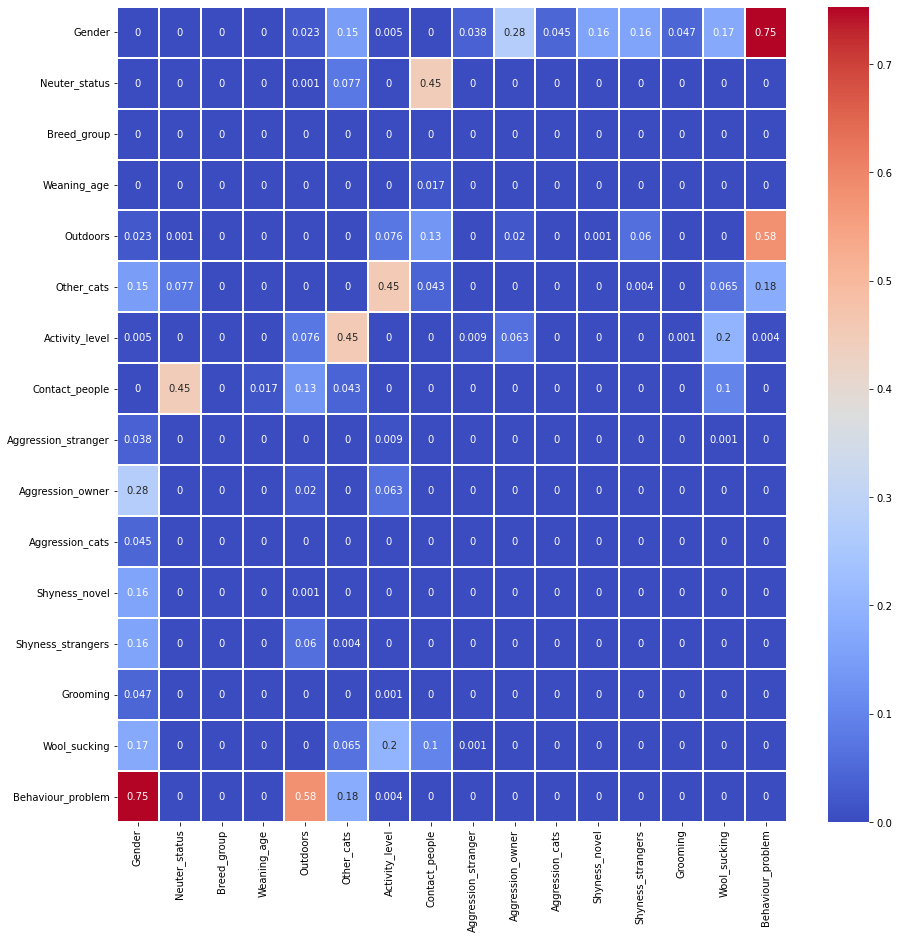

In [5]:
plt.subplots(figsize=(15, 15))
sns.heatmap(chisqmatrix.astype(np.float64), annot=True,linewidths=0.1, 
            cmap='coolwarm');

* Age does not seem to be correlated with squat-diddly! 
* Other than that, everything seems to be correlated with everything? I think for grins and giggles we're going to treat Wool_sucking as our dependent variable for now. I feel like Weaning_age makes sense as a potential explanatory variable. 

In [27]:
x = cat_data.loc[cat_data["Wool_sucking"]==0, 'Weaning_age']
y0 = cat_data.loc[cat_data["Wool_sucking"]==0, 'Wool_sucking']
y1 = cat_data.loc[cat_data["Wool_sucking"]==1, 'Wool_sucking']

fig, ax = plt.subplots(figsize=(10, 10))

ax.bar(x, y0, color="red", label="never")
# ax.bar(x, y1, bottom=y1, color="orange", label="1-3 times/lifetime")
#ax.bar(cat_data["Weaning_age"], cat_data[cat_data["Wool_sucking"]==2], bottom=cat_data[cat_data["Wool_sucking"]==1] + cat_data[cat_data["Wool_sucking"]==0], color="yellow", label="1-12 times/yr")
'''
ax.bar(cat_data[cat_data["Wool_sucking"]==3]["Weaning_age"], color="green", label="1-4 times/mnth")
ax.bat(cat_data[cat_data["Wool_sucking"]==4]["Weaning_age"], color="blue", label="1-3 times/week")
ax.bar(cat_data[cat_data["Wool_sucking"]==5]["Weaning_age"], color="indigo", label="daily")
ax.bar(cat_data[cat_data["Wool_sucking"]==6]["Weaning_age"], color="purple", label="many times per day")
ax.bar(cat_data[cat_data["Wool_sucking"]==7]["Weaning_age"], color="goldenrod", label="most of the day")
'''
x.shape, y0.shape

,Age,Gender,Neuter_status,Breed_group,Weaning_age,Outdoors,Other_cats,Activity_level,Contact_people,Aggression_stranger,...,Aggression_cats,Shyness_novel,Shyness_strangers,Grooming,Wool_sucking,Behaviour_problem,Aggression_component,Shyness_component,Extraversion_component,ws0
0,4.0274,2,1,BEN,8,0,1,4,5,1,...,1,2,1,1.0,0.0,1.0,-0.392731,-0.364198,0.666318,3891
1,2.1096,2,1,BEN,8,0,1,5,4,1,...,1,3,3,1.0,0.0,1.0,-0.633626,1.419777,0.994083,3891
2,7.6822,1,1,BUR,4,0,1,4,5,1,...,1,2,1,4.0,3.0,2.0,-0.392731,-0.364198,0.666318,3891
3,5.0027,1,1,BUR,4,4,0,5,5,1,...,2,1,1,1.0,0.0,1.0,0.090309,-0.780989,1.330449,3891
4,5.0137,1,1,EUR,4,5,1,4,5,1,...,1,2,1,1.0,0.0,1.0,-0.392731,-0.364198,0.666318,3891
5,4.0082,2,1,BUR,4,0,1,3,3,1,...,2,2,2,1.0,0.0,1.0,-0.083165,-0.076349,-1.218302,3891
6,1.2192,1,1,BEN,6,1,1,5,5,1,...,1,4,3,3.0,0.0,1.0,-0.678079,1.975425,1.716065,3891
7,5.8767,2,0,BRI,6,1,1,3,4,1,...,2,2,2,1.0,0.0,1.0,-0.055601,-0.080141,-0.599995,3891
8,1.2630,2,1,SBI,4,1,1,5,4,1,...,1,3,2,1.0,0.0,1.0,-0.567834,0.903956,0.940285,3891
14,3.9041,1,1,ABY,5,1,1,5,5,1,...,3,2,1,1.0,0.0,1.0,0.439047,-0.268003,1.467123,3891
